<div align="center">
    <p style="font-family: 'Comic Sans MS', cursive, sans-serif; font-size: 32px; color: #FF4500; font-weight: bold;">
        Stock Price Prediction
    </p>
</div>


<div align="center">
    <p style="font-family: 'Comic Sans MS', cursive, sans-serif; font-size: 18px; color: #008080;">
        <strong>Yuvraj Tiwary</strong>
    </p>
    <p style="font-family: 'Comic Sans MS', cursive, sans-serif; font-size: 16px; color: #696969;">
        This project demonstrates how machine learning models can be used to predict stock prices based on historical data, helping investors make informed decisions.
    </p>
</div>


<div style="border: 2px solid #333; padding: 10px; border-radius: 10px; margin: 10px;">

### Data Import and Cleaning
The script imports a dataset containing stock prices, and then cleans the data by removing unnecessary columns.

---

### Data Visualization
It visualizes the data using scatter plots and histograms to understand the distribution and relationships between variables.

---

### Model Building
It builds four different regression models: Simple Linear Regression, Support Vector Regression, Decision Tree Regression, and Random Forest Regression.

---

### Model Evaluation
Each model is evaluated using the R-squared score to measure its accuracy in predicting stock prices.

---

### Results Visualization
The script visualizes the accuracies of the four models using a bar chart, making it easy to compare their performance.

---

### Predicting Future Stock Price
Finally, the script predicts the closing price of a stock for a specific date using the model with the highest accuracy.

</div>


<font color='blue'>

# Data Import and Cleaning: 
The script imports a dataset containing stock prices, and then cleans the data by removing unnecessary columns.

</font>



## Import Libraries and Dataset

In [306]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

In [307]:
dataset = pd.read_csv('Dataset.csv')

## Information about the dataset

In [308]:
dataset.shape

(5306, 15)

In [309]:
from IPython.display import display, HTML

# Generate HTML code for the table
table_html = """
<div style="background-color: #f9f9f9; padding: 10px; border-radius: 5px;">
    <h3>Dataset Columns</h3>
    <table>
        <tr>
            <th>Column Name</th>
        </tr>
"""

for column in dataset.columns:
    table_html += f"""
        <tr>
            <td>{column}</td>
        </tr>
    """

table_html += """
    </table>
</div>
"""

# Display the HTML table
display(HTML(table_html))


Column Name
Date
Symbol
Series
Prev Close
Open
High
Low
Last
Close
VWAP


In [310]:
from IPython.display import display, HTML

# Generate HTML code for the table
table_html = """
<div style="background-color: #f9f9f9; padding: 10px; border-radius: 5px;">
    <h3>Dataset Info</h3>
    <table>
        <tr>
            <th>Column Name</th>
            <th>Non-Null Count</th>
            <th>Dtype</th>
        </tr>
"""

for column in dataset.columns:
    non_null_count = dataset[column].count()
    dtype = dataset[column].dtype
    table_html += f"""
        <tr>
            <td>{column}</td>
            <td>{non_null_count}</td>
            <td>{dtype}</td>
        </tr>
    """

table_html += """
    </table>
</div>
"""

# Display the HTML table
display(HTML(table_html))


Column Name,Non-Null Count,Dtype
Date,5306,object
Symbol,5306,object
Series,5306,object
Prev Close,5306,float64
Open,5306,float64
High,5306,float64
Low,5306,float64
Last,5306,float64
Close,5306,float64
VWAP,5306,float64


In [311]:
from IPython.display import display, HTML

# Get the describe() output
desc = dataset.describe()

# Convert the describe() output to an HTML table
table_html = "<table>"
table_html += "<tr><th></th>"
for column in desc.columns:
    table_html += f"<th>{column}</th>"
table_html += "</tr>"

for index, row in desc.iterrows():
    table_html += "<tr>"
    table_html += f"<td>{index}</td>"
    for value in row:
        table_html += f"<td>{value:.2f}</td>"
    table_html += "</tr>"

table_html += "</table>"

# Display the HTML table
display(HTML(table_html))


,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,5306.00,5306.00,5306.00,5306.00,5306.00,5306.00,5306.00,5306.00,5306.00,2456.00,4789.00,4789.00
mean,550.90,551.56,560.56,541.53,551.05,551.00,551.13,8224630.71,375929920576296.62,138367.63,4183406.04,0.47
std,368.78,368.89,374.08,363.39,368.71,368.73,368.75,12185349.04,475813345498016.69,99008.73,6365381.73,0.13
min,67.40,67.00,70.45,66.00,67.00,67.40,68.52,7409.00,96172830000.00,2595.00,15015.00,0.10
25%,267.56,267.40,271.91,263.62,267.40,267.61,267.58,961205.50,34594425000000.00,79312.25,699502.00,0.38
50%,398.08,399.00,406.52,392.45,398.70,398.18,398.24,3486647.50,292301000000000.00,110101.00,1963117.00,0.48
75%,873.56,877.00,888.77,859.80,874.60,873.56,873.51,11572021.25,499352750000000.00,162953.50,5948817.00,0.56
max,1794.10,1767.05,1798.15,1760.15,1793.00,1794.10,1783.46,286857658.00,14600000000000000.00,949891.00,232530747.00,0.98


## Data Cleaning

In [312]:
# we can visualize, Before cleaning 
# display(dataset.head().style.hide_index())

In [313]:
# Delete unnecessary columns

# dataset.drop(["Symbol", "Series", "Prev Close", "High", "Low", "Last", "VWAP", "Volume", "Turnover", "Trades", "Deliverable Volume", "%Deliverble"], 
# axis = 1, inplace = True)
dataset.drop(columns=dataset.columns.difference(['Date', 'Open', 'Close']), inplace=True)


In [314]:
# we can visualize, Before cleaning 
# display(dataset.head().style.hide_index())

<font color='green'>

# Data Visualization: 
It visualizes the data using scatter plots and histograms to understand the distribution and relationships between variables.

</font>

In [315]:
import plotly.express as px

fig = px.scatter(dataset.head(100), x="Open", y="Close", title="Open v/s Close", color_discrete_sequence=['orange'])
fig.show()


In [316]:
import plotly.graph_objects as go

# Create scatter plot
fig1 = px.scatter(dataset.head(100), x="Open", y="Close", title="Open v/s Close", color_discrete_sequence=['orange'])

# Create histogram
fig2 = px.histogram(dataset, x="Close", nbins=50, title="Histogram of Close Prices", color_discrete_sequence=['orange'])

# Create subplots
fig = go.Figure()
fig.add_trace(fig1['data'][0])
fig.add_trace(fig2['data'][0])

# Update layout
fig.update_layout(title="Scatter Plot and Histogram", showlegend=False)

# Show the figure
fig.show()


## Import Models

In [317]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

<font color='orange'>

# Model Building: 
It builds four different regression models: Simple Linear Regression, Support Vector Regression, Decision Tree Regression, and Random Forest Regression.

</font>

### Simple Linear Regression

In [318]:
X = dataset['Open'].values
y = dataset['Close'].values

In [319]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3)

In [320]:
model1 = LinearRegression()
build1 = model1.fit(X_train.reshape(-1, 1), y_train)
predict1 = model1.predict(X_test.reshape(-1, 1))

In [321]:
print("Co-efficient: ", model1.coef_)
print("\nIntercept: ", model1.intercept_)

Co-efficient:  [0.99860402]

Intercept:  0.24768269983928803


In [349]:
from IPython.display import HTML

html_table = df1.head(10).to_html(index=False, justify='center', classes='table table-striped table-hover table-bordered')
styled_table = f'<div style="text-align: center;"><style>table {{border-collapse: collapse; width: 50%;}} th, td {{border: 1px solid #dddddd; text-align: left; padding: 8px;}} th {{background-color: #f2f2f2;}}</style>{html_table}</div>'
display(HTML(styled_table))


Actual Values,Predicted Values
136.80,137.635962
330.20,339.076123
879.15,872.417691
262.50,263.598544
580.70,569.507672
1040.20,1024.272582
360.70,359.570035
852.15,856.422442
829.05,869.418582
187.60,184.622005


In [323]:
import plotly.express as px
import plotly.io as pio

# Create the bar plot
fig = px.bar(df1.head(50), title='Simple Linear Regression', barmode='group', color_discrete_sequence=px.colors.qualitative.Plotly)

# Customize the layout
fig.update_layout(
    xaxis_title='Index',
    yaxis_title='Values',
    legend_title='Data',
    width=1200,
    height=600,
    xaxis_tickangle=-45,  # Rotate x-axis labels for better readability
    showlegend=True,      # Show legend
    font=dict(size=12),   # Set font size
    plot_bgcolor='rgba(0,0,0,0)',  # Set plot background color
    paper_bgcolor='rgba(0,0,0,0)', # Set paper background color
    bargap=0.1,           # Set gap between bars
    xaxis=dict(showgrid=True, gridcolor='rgba(0,0,0,0.1)'), # Show x-axis gridlines
    yaxis=dict(showgrid=True, gridcolor='rgba(0,0,0,0.1)')  # Show y-axis gridlines
)

# Add data labels to the bars
fig.update_traces(texttemplate='%{y}', textposition='outside')

# Display the plot
fig.show()

# Save the plot as a PNG file
# pio.write_image(fig, 'bar_plot.png')


In [324]:
accuracy1 = r2_score(y_test, predict1)
print("Accuracy of Simple Linear Regression:", accuracy1)

Accuracy of Simple Linear Regression: 0.99849322863788


### Support Vector Regression

In [325]:
model2 = SVR(kernel="rbf", gamma = 0.01, C=100)
build2 = model2.fit(X_train.reshape(-1, 1), y_train)
predict2 = model2.predict(X_test.reshape(-1, 1))

In [326]:
df2 = pd.DataFrame(list(zip(y_test, predict2)), columns=["Actual Values", "Predicted Values"])

In [350]:
import pandas as pd

# Assuming df2 is your DataFrame
data = {'Actual Values': df2['Actual Values'], 'Predicted Values': df2['Predicted Values']}
df_table = pd.DataFrame(data)

styled_df_table = df_table.head(10).style.set_table_styles([
    {'selector': 'th.row_heading', 'props': 'display: none;'}
]).set_properties(**{'text-align': 'center'})

styled_df_table


,Actual Values,Predicted Values
0,1023.250000,1016.899042
1,392.050000,392.051720
2,550.900000,533.321320
3,301.100000,302.149611
4,362.300000,352.221443
5,212.900000,214.536149
6,264.000000,263.939771
7,631.750000,608.350294
8,967.900000,966.007576
9,574.700000,545.773854


In [353]:
import plotly.express as px

# Create the bar plot
fig = px.bar(df2.head(50), title='Support Vector Regression', barmode='group', color_discrete_sequence=px.colors.qualitative.Plotly)

# Customize the layout
fig.update_layout(
    xaxis_title='Index',
    yaxis_title='Values',
    legend_title='Data',
    width=1200,
    height=600,
    xaxis_tickangle=-45,  # Rotate x-axis labels for better readability
    showlegend=True,      # Show legend
    font=dict(size=12),   # Set font size
    plot_bgcolor='rgba(0,0,0,0)',  # Set plot background color
    paper_bgcolor='rgba(0,0,0,0)', # Set paper background color
    bargap=0.1,           # Set gap between bars
    xaxis=dict(showgrid=True, gridcolor='rgba(0,0,0,0.1)'), # Show x-axis gridlines
    yaxis=dict(showgrid=True, gridcolor='rgba(0,0,0,0.1)')  # Show y-axis gridlines
)

# Add data labels to the bars
fig.update_traces(texttemplate='%{y}', textposition='outside')

# Display the plot
fig.show()


In [329]:
accuracy2 = r2_score(y_test, predict2)
print("Accuracy of Support Vector Regression:", accuracy2)

Accuracy of Support Vector Regression: 0.9799364177634605


### Decision Tree Regression

In [330]:
model3 = DecisionTreeRegressor()
build3 = model3.fit(X_train.reshape(-1, 1), y_train)
predict3 = model3.predict(X_test.reshape(-1, 1))

In [331]:
df3 = pd.DataFrame(list(zip(y_test, predict3)), columns=["Actual Values", "Predicted Values"])

In [351]:
import pandas as pd

# Assuming df3 is your DataFrame
data = {'Actual Values': df3['Actual Values'], 'Predicted Values': df3['Predicted Values']}
df_table = pd.DataFrame(data)

styled_df_table = df_table.head(10).style.set_table_styles([
    {'selector': 'th.row_heading', 'props': 'display: none;'}
]).set_properties(**{'text-align': 'center'})

styled_df_table


,Actual Values,Predicted Values
0,1023.250000,1022.950000
1,392.050000,383.900000
2,550.900000,528.700000
3,301.100000,303.883333
4,362.300000,348.425000
5,212.900000,211.000000
6,264.000000,264.450000
7,631.750000,601.550000
8,967.900000,966.050000
9,574.700000,549.300000


In [354]:
import plotly.express as px

# Create the bar plot
fig = px.bar(df3.head(50), title='Decision Tree Regression', barmode='group', color_discrete_sequence=px.colors.qualitative.Plotly)

# Customize the layout
fig.update_layout(
    xaxis_title='Index',
    yaxis_title='Values',
    legend_title='Data',
    width=1200,
    height=600,
    xaxis_tickangle=-45,  # Rotate x-axis labels for better readability
    showlegend=True,      # Show legend
    font=dict(size=12),   # Set font size
    plot_bgcolor='rgba(0,0,0,0)',  # Set plot background color
    paper_bgcolor='rgba(0,0,0,0)', # Set paper background color
    bargap=0.1,           # Set gap between bars
    xaxis=dict(showgrid=True, gridcolor='rgba(0,0,0,0.1)'), # Show x-axis gridlines
    yaxis=dict(showgrid=True, gridcolor='rgba(0,0,0,0.1)')  # Show y-axis gridlines
)

# Add data labels to the bars
fig.update_traces(texttemplate='%{y}', textposition='outside')

# Display the plot
fig.show()


In [334]:
accuracy3 = r2_score(y_test, predict3)
print("Accuracy of Decision Tree Regression:", accuracy3)

Accuracy of Decision Tree Regression: 0.9973466715973613


### Random Forest Regression

In [335]:
model4 = RandomForestRegressor(n_estimators=100)
build4 = model4.fit(X_train.reshape(-1, 1), y_train)
predict4 = model4.predict(X_test.reshape(-1, 1))

In [336]:
df4 = pd.DataFrame(list(zip(y_test, predict4)), columns=["Actual Values", "Predicted Values"])

In [352]:
import pandas as pd

# Assuming df4 is your DataFrame
data = {'Actual Values': df4['Actual Values'], 'Predicted Values': df4['Predicted Values']}
df_table = pd.DataFrame(data)

styled_df_table = df_table.head(10).style.set_table_styles([
    {'selector': 'th.row_heading', 'props': 'display: none;'}
]).set_properties(**{'text-align': 'center'})

styled_df_table


,Actual Values,Predicted Values
0,1023.250000,1019.395500
1,392.050000,392.366250
2,550.900000,530.443500
3,301.100000,303.901994
4,362.300000,348.924955
5,212.900000,211.364093
6,264.000000,264.753700
7,631.750000,603.482300
8,967.900000,968.403500
9,574.700000,550.432000


In [355]:
import plotly.express as px

# Create the bar plot
fig = px.bar(df4.head(50), title='Random Forest Regression', barmode='group', color_discrete_sequence=px.colors.qualitative.Plotly)

# Customize the layout
fig.update_layout(
    xaxis_title='Index',
    yaxis_title='Values',
    legend_title='Data',
    width=1200,
    height=600,
    xaxis_tickangle=-45,  # Rotate x-axis labels for better readability
    showlegend=True,      # Show legend
    font=dict(size=12),   # Set font size
    plot_bgcolor='rgba(0,0,0,0)',  # Set plot background color
    paper_bgcolor='rgba(0,0,0,0)', # Set paper background color
    bargap=0.1,           # Set gap between bars
    xaxis=dict(showgrid=True, gridcolor='rgba(0,0,0,0.1)'), # Show x-axis gridlines
    yaxis=dict(showgrid=True, gridcolor='rgba(0,0,0,0.1)')  # Show y-axis gridlines
)

# Add data labels to the bars
fig.update_traces(texttemplate='%{y}', textposition='outside')

# Display the plot
fig.show()


In [339]:
accuracy4 = r2_score(y_test, predict4)
print("Accuracy of Random Forest Regression:", accuracy4)

Accuracy of Random Forest Regression: 0.9979437067080489


<font color='red'>

# Results Visualization: 
The script visualizes the accuracies of the four models using a bar chart, making it easy to compare their performance.

</font>

In [340]:
dict1 = {
    "Model": ["Simple Linear Regression", "Support Vector Regression", "Decision Tree Regression", "Random Forest Regression"],
    "Accuracy": np.array([accuracy1, accuracy2, accuracy3, accuracy4])
}
df = pd.DataFrame(dict1)
styled_df = df.style.set_table_styles([{'selector': 'tr:hover','props': [('background-color', 'yellow')]}])
styled_df


,Model,Accuracy
0,Simple Linear Regression,0.998493
1,Support Vector Regression,0.979936
2,Decision Tree Regression,0.997347
3,Random Forest Regression,0.997944


In [356]:
import plotly.graph_objects as go

models = ['SLR', 'SVR', 'DTR', 'RFR']
acc = [accuracy1, accuracy2, accuracy3, accuracy4]

# Create a figure
fig = go.Figure()

# Add bar trace
fig.add_trace(go.Bar(
    x=models,
    y=acc,
    marker=dict(color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']),  # Change bar colors
    text=acc,
    textposition='auto'
))

# Update layout
fig.update_layout(
    title='Comparison of Accuracies of Models',
    yaxis=dict(title='Accuracy'),
    xaxis=dict(title='Models'),
    yaxis_tickformat='.2%',  # Format y-axis ticks as percentage
    height=500,  # Set plot height
)

# Show plot
fig.show()


## Find out the closing price of the company of that day

In [342]:
html_table = future_stock_value.to_html(index=False, justify='center', classes='table table-striped table-hover table-bordered')
styled_table = f'<style>table {{border-collapse: collapse; width: 50%;}} th, td {{border: 1px solid #dddddd; text-align: left; padding: 8px;}} th {{background-color: #f2f2f2;}}</style>{html_table}'
display(HTML(styled_table))


Date,Open,Predicted
11-May-22,718.0,717.130664


<font color='brown'>

# Predicting Future Stock Price: 
Finally, the script predicts the closing price of a stock for a specific date using the model with the highest accuracy.

</font>

In [343]:
models = np.array(df['Model'])
accuracy = np.array(df['Accuracy'])

In [344]:
highest_accuracy=0.0
best_model=""

In [345]:
for i in range(len(accuracy)) :
    if accuracy[i] >= highest_accuracy :
        highest_accuracy=accuracy[i]
        best_model=models[i]

In [346]:
slr, svr, dtr, rfr = [], [], [], []

if best_model == models[0] :
    future_stock_value['Predicted'] = model1.predict(future_stock_value.Open.values.reshape(-1, 1))
elif best_model == models[1] :
    future_stock_value['Predicted'] = model2.predict(future_stock_value.Open.values.reshape(-1, 1))
elif best_model == models[2] :
    future_stock_value['Predicted'] = model3.predict(future_stock_value.Open.values.reshape(-1, 1))
elif best_model == models[3] :
    future_stock_value['Predicted'] = model4.predict(future_stock_value.Open.values.reshape(-1, 1))

In [347]:
print(future_stock_value.to_string(index=False))


     Date  Open  Predicted
11-May-22 718.0  717.24537


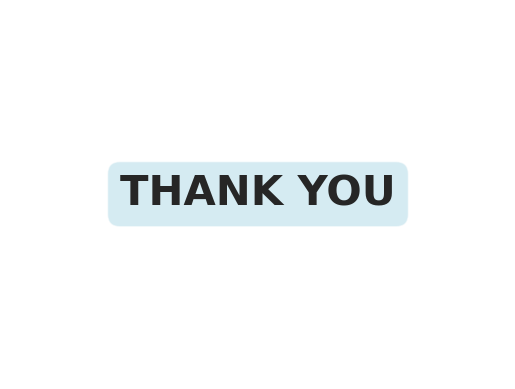

In [348]:
fig, ax = plt.subplots()
ax.axis('off')

props = dict(boxstyle='round', facecolor='lightblue', alpha=0.5)
ax.text(0.5, 0.5, 'THANK YOU', va='center', ha='center', fontsize=30, fontweight='bold', bbox=props)

plt.show()
